Name: Pratham Shewale Roll_no: TEBD22618

In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv("Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info() # View non-null count and dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Drop ID column because unnecessary
df.drop("Id", axis=1, inplace=True)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Define features and target
X = df.drop("Species", axis=1)
y = df["Species"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm.ravel()[[0, 1, 3, 4]] # for setosa

In [8]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

# Output results
metrics_dict = {
    "True Positives (TP)": tp,
    "False Positives (FP)": fp,
    "False Negatives (FN)": fn,
    "True Negatives (TN)": tn,
    "Accuracy": accuracy,
    "Error Rate": error_rate,
    "Precision": precision,
    "Recall": recall
}

for key, value in metrics_dict.items(): print(f"{key:<25}: {value:.2f}")

True Positives (TP)      : 6.00
False Positives (FP)     : 0.00
False Negatives (FN)     : 0.00
True Negatives (TN)      : 12.00
Accuracy                 : 0.93
Error Rate               : 0.07
Precision                : 0.93
Recall                   : 0.93


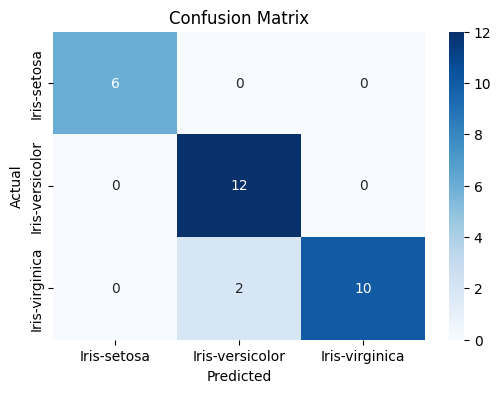

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df["Species"].unique(), 
           yticklabels=df["Species"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label =LabelEncoder()
df['Species'] =label.fit_transform(df['Species'])

In [27]:
coree =df.corr()

<Axes: >

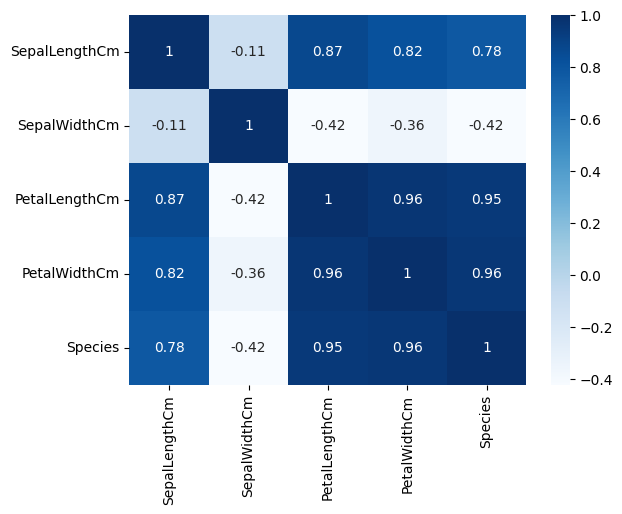

In [28]:
sns.heatmap(coree ,cmap="Blues" ,annot =True )

In [29]:
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['number', 'float64' ,'int64']).columns

# Step 2: Drop rows with missing values in numeric columns
df_clean = df.dropna(subset=numeric_cols)
print("Before Cleaning:", df_clean.shape)

# Step 3: Dictionary to store outliers
outliers_dict = {}

# Step 4: Detect and store outliers per column
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    
    # Store if outliers are present
    if not outliers.empty:
        outliers_dict[col] = outliers[[col]]

    # Remove outliers from the data
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print(f"\nFinal cleaned data shape: {df_clean.shape}")


Before Cleaning: (150, 5)

Final cleaned data shape: (146, 5)


In [30]:
print(outliers_dict.keys())

dict_keys(['SepalWidthCm'])


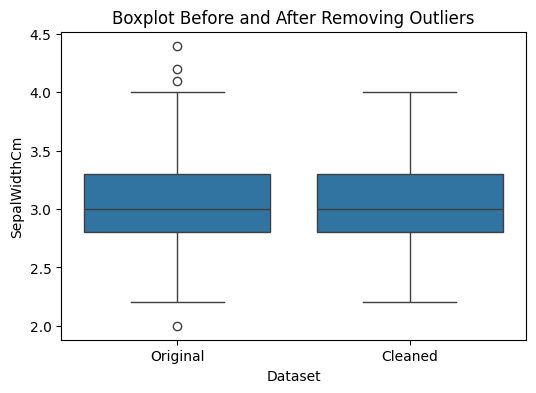

In [31]:
plot_df = pd.DataFrame({
    'SepalWidthCm': pd.concat([
        df['SepalWidthCm'],  # original
        df_clean['SepalWidthCm'],  # cleaned
    ], ignore_index=True),
    'Dataset': ['Original'] * len(df) + ['Cleaned'] * len(df_clean)
})

# Plot side-by-side boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(x='Dataset', y='SepalWidthCm', data=plot_df)
plt.title("Boxplot Before and After Removing Outliers")
plt.show()
